In [1]:
%matplotlib inline

#### The usual imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#### Sklearn

In [3]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.pipeline import FeatureUnion, Pipeline

#### Load the dataset

In [4]:
dataset = pd.read_csv("adult.csv")
print(dataset.shape)
print()
print(dataset.columns.values)

(32561, 15)

['age' 'workclass' 'fnlwgt' 'education' 'education_num' 'marital_status'
 'occupation' 'relationship' 'race' 'sex' 'capital_gain' 'capital_loss'
 'hours_per_week' 'native_country' 'income']


#### Lets explore some features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11099f748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110c67278>]], dtype=object)

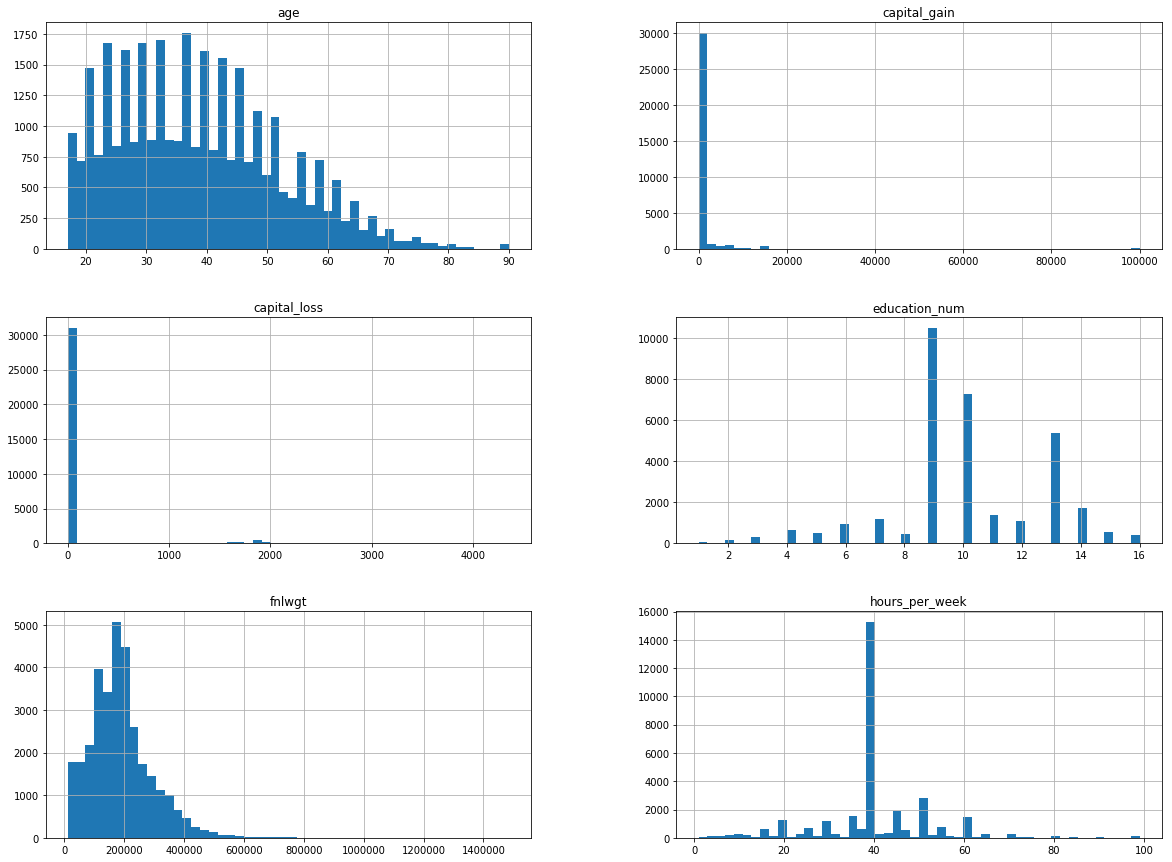

In [5]:
dataset.hist(bins=50, figsize=(20,15))

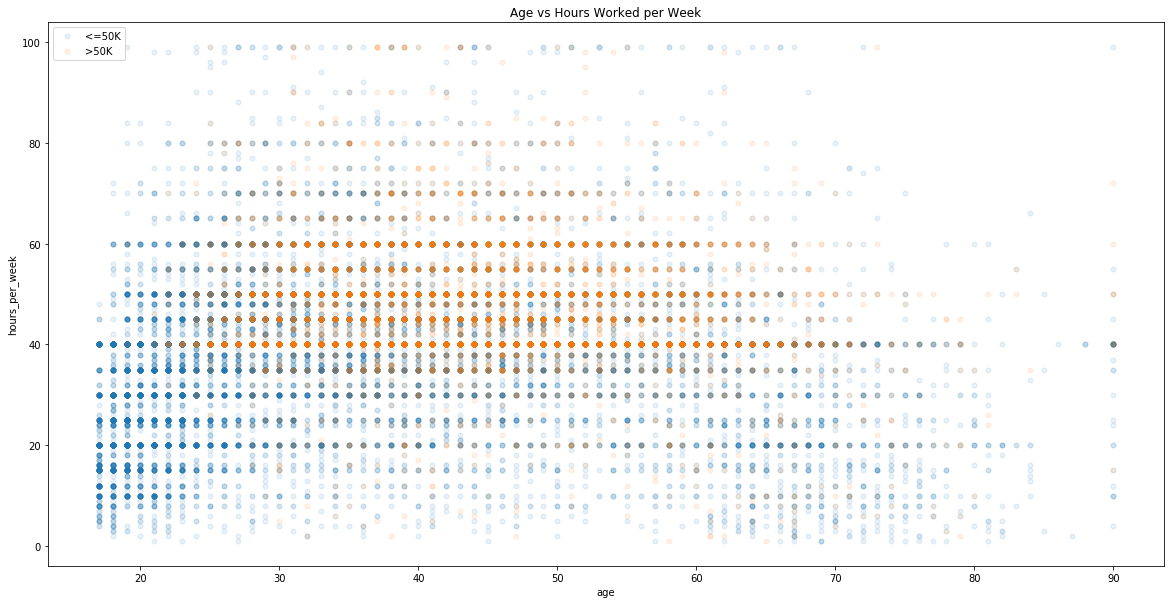

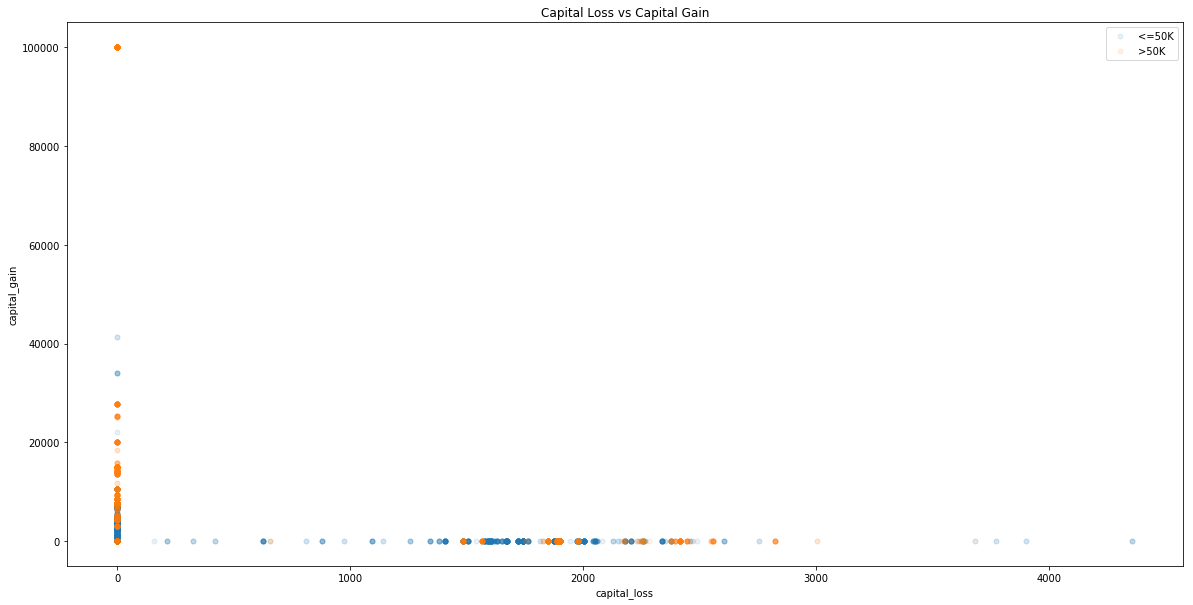

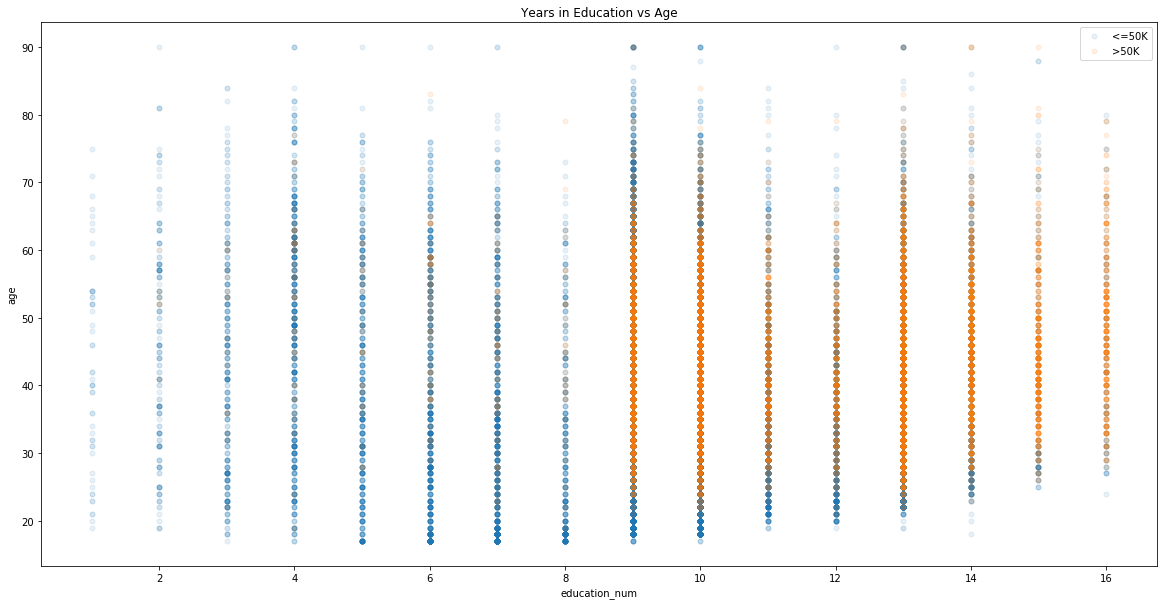

In [6]:
def createScatterSubPlot(x_feature, y_feature):
    fig, ax = plt.subplots(figsize=(20, 10))
    
    for name, group in dataset.groupby('income'):
        ax.plot(group[x_feature], group[y_feature], marker='o', linestyle='', ms=5, label=name, alpha=0.1)
    ax.legend()
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)

createScatterSubPlot("age", "hours_per_week")
plt.title('Age vs Hours Worked per Week')
createScatterSubPlot("capital_loss", "capital_gain")
plt.title('Capital Loss vs Capital Gain')
createScatterSubPlot("education_num", "age")
plt.title('Years in Education vs Age')

plt.show()

Most people earning >50k have 9 years or more of education, are aged between around 25 and 60, work atleast 40 hours per week, and have experienced little capital loss.

#### Lets see how our dataset is divided

{'<=50K': 370800, '>50K': 117615}


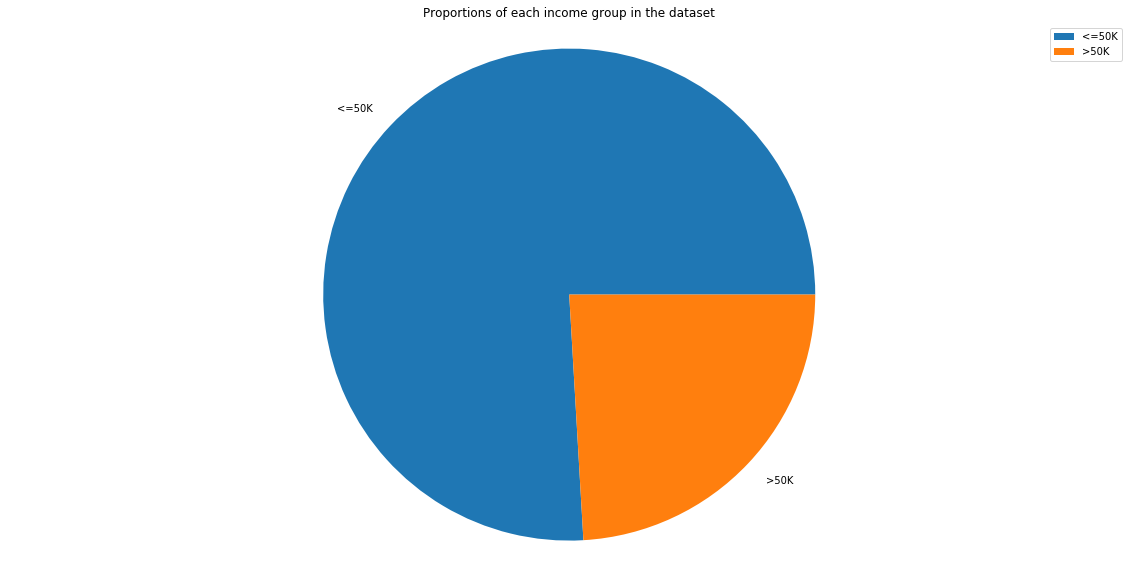

In [7]:
incomeCategories = dict()
for name, group in dataset.groupby('income'):
    incomeCategories[str(name)] = int(group.size)
 
print(incomeCategories)

fig, ax = plt.subplots(figsize=(20, 10))
ax.pie(list(incomeCategories.values()), labels=incomeCategories.keys())
ax.legend()
ax.axis('equal') 
plt.title('Proportions of each income group in the dataset')
plt.show()

{'<=50K': {'Female': 143880, 'Male': 226920}, '>50K': {'Female': 17685, 'Male': 99930}}


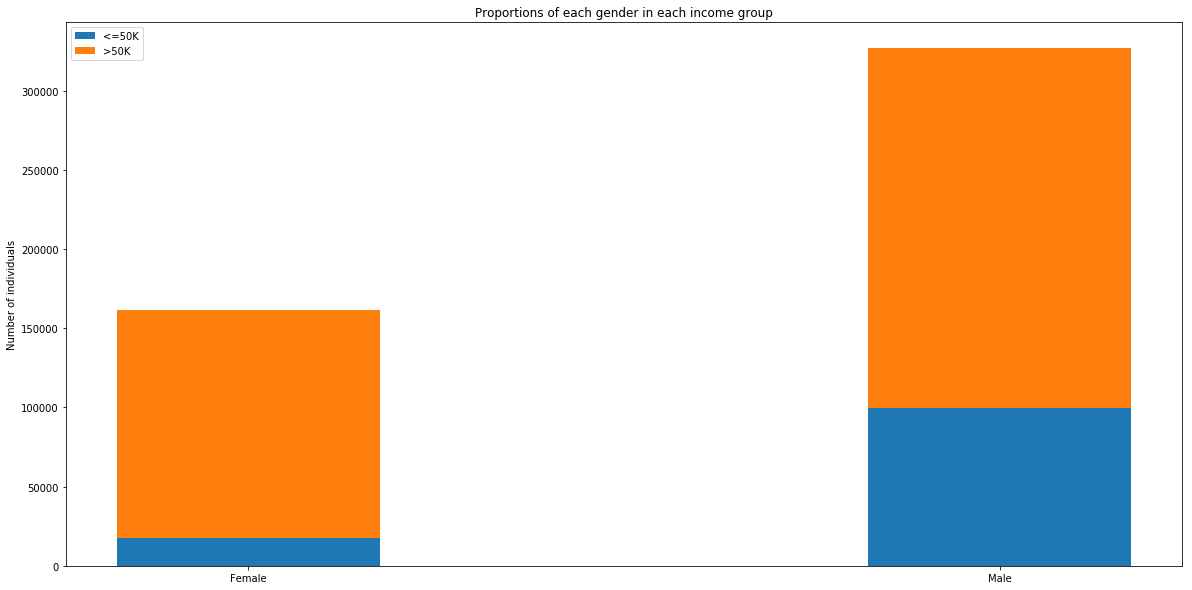

In [8]:
def countGroupOfGroups(topGroupName, secondGroupName):
    """Divide the dataset using two of its attributes, return a dictionary containing the counts of samples
    that fall into each group"""
    
    topCategories = dict()

    for name, group in dataset.groupby(topGroupName):
        subcategories = dict()
        subgroups = group.groupby(secondGroupName)

        for genderName, genderGroup in subgroups:
            subcategories[str(genderName)] = int(genderGroup.size)

        topCategories[str(name)] = subcategories
    
    return topCategories

# Plot how income is divided by gender
genderCategories = countGroupOfGroups("income", "sex")
print(genderCategories)

ind = np.arange(len(genderCategories["<=50K"])) 
barWidth = 0.35

plt.subplots(figsize=(20, 10))
p1 = plt.bar(ind, genderCategories[">50K"].values(), barWidth)
p2 = plt.bar(ind, genderCategories["<=50K"].values(), barWidth, bottom=genderCategories[">50K"].values())

plt.ylabel('Number of individuals')
plt.title('Proportions of each gender in each income group')
plt.xticks(ind, genderCategories["<=50K"].keys())
plt.legend((p1[0], p2[0]), genderCategories.keys())
plt.show()

More individuals in the dataset earn <=50k than >50k, and there are more men than women in the dataset. The proportion of women earning >50k is significantly smaller than the proportion of women earning <=50k. 

{'<=50K': {'Asian-Pac-Islander': 11445, 'Amer-Indian-Eskimo': 4125, 'White': 310485, 'Other': 3690, 'Black': 41055}, '>50K': {'Asian-Pac-Islander': 4140, 'Amer-Indian-Eskimo': 540, 'White': 106755, 'Other': 375, 'Black': 5805}}


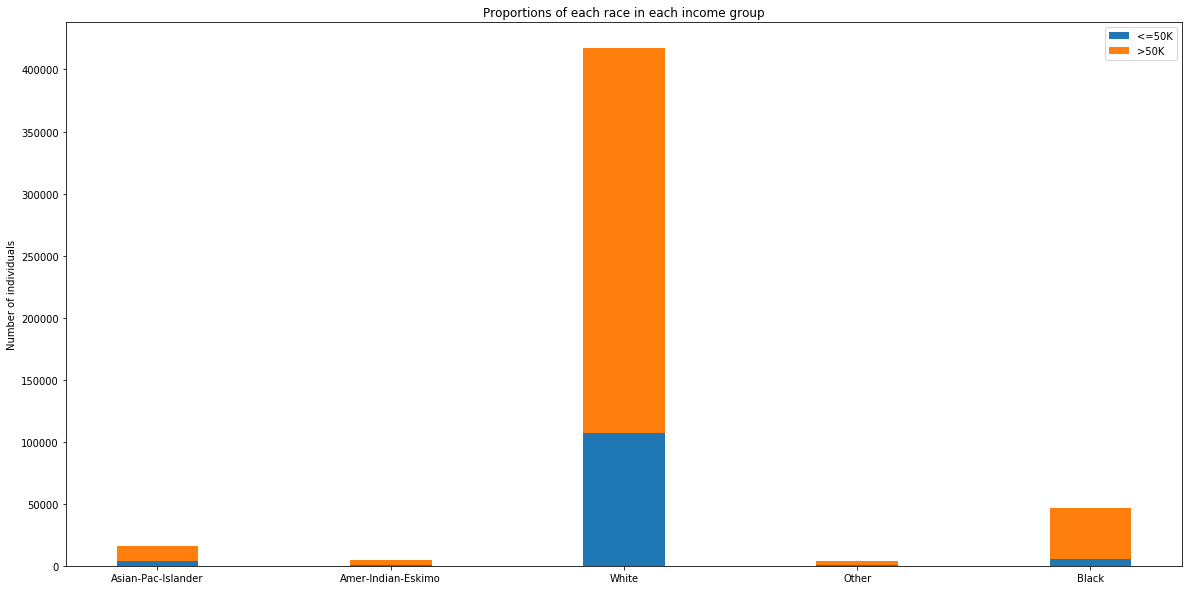

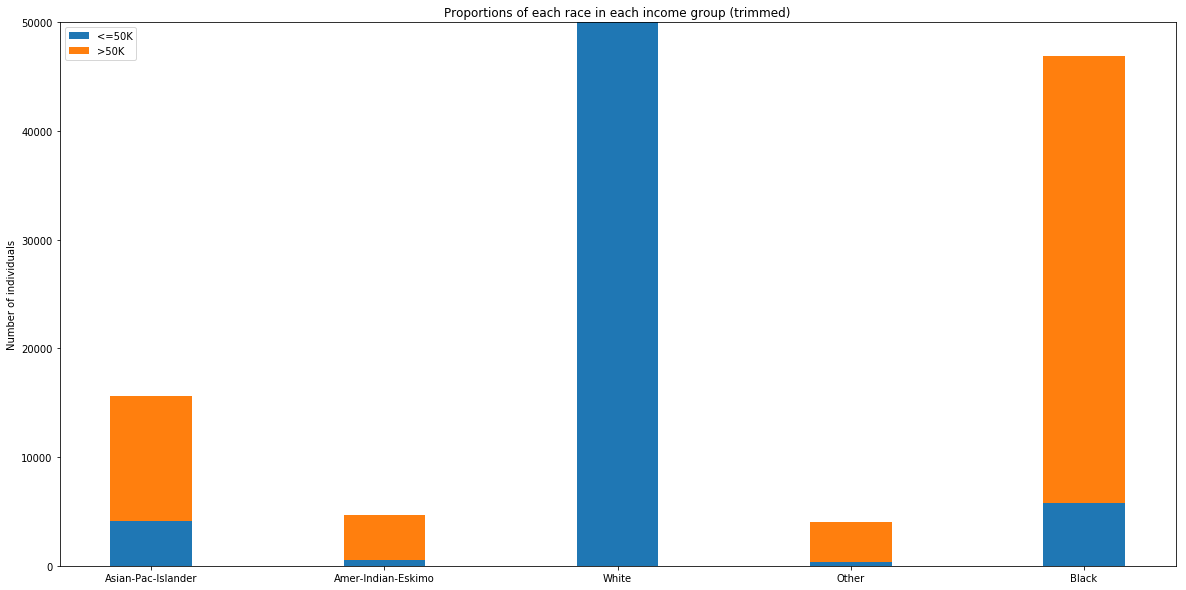

In [9]:
# Plot how income is divided by race
raceCategories = countGroupOfGroups("income", "race")
print(raceCategories)

ind = np.arange(len(raceCategories[">50K"])) 
barWidth = 0.35

plt.subplots(figsize=(20, 10))
p1 = plt.bar(ind, raceCategories[">50K"].values(), barWidth)
p2 = plt.bar(ind, raceCategories["<=50K"].values(), barWidth, bottom=raceCategories[">50K"].values())

plt.ylabel('Number of individuals')
plt.title('Proportions of each race in each income group')
plt.xticks(ind, raceCategories[">50K"].keys())
plt.legend((p1[0], p2[0]), raceCategories.keys())
plt.show()

# Plot the same thing again, but trim the y axis so that some areas of the graph are more visible
plt.subplots(figsize=(20, 10))
p1 = plt.bar(ind, raceCategories[">50K"].values(), barWidth)
p2 = plt.bar(ind, raceCategories["<=50K"].values(), barWidth, bottom=raceCategories[">50K"].values())

plt.ylabel('Number of individuals')
plt.title('Proportions of each race in each income group (trimmed)')
plt.xticks(ind, raceCategories[">50K"].keys())
plt.legend((p1[0], p2[0]), raceCategories.keys())
plt.ylim([0,50000])
plt.show()

Across all races more individuals earn <=50k than >50k, compared to other races a higher proportion of white individuals earn >50k than <=50k.

#### Prepare the test set

First we'll set aside the training set

In [10]:
X = dataset.drop("income", axis=1)
y = dataset["income"]

y_binarizer = LabelBinarizer()
y = y_binarizer.fit_transform(y)

print("X:\n", X)
print("y:\n", y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X:
        age         workclass  fnlwgt     education  education_num  \
0       90                 ?   77053       HS-grad              9   
1       82           Private  132870       HS-grad              9   
2       66                 ?  186061  Some-college             10   
3       54           Private  140359       7th-8th              4   
4       41           Private  264663  Some-college             10   
5       34           Private  216864       HS-grad              9   
6       38           Private  150601          10th              6   
7       74         State-gov   88638     Doctorate             16   
8       68       Federal-gov  422013       HS-grad              9   
9       41           Private   70037  Some-college             10   
10      45           Private  172274     Doctorate             16   
11      38  Self-emp-not-inc  164526   Prof-school             15   
12      52           Private  129177     Bachelors             13   
13      32           Private  

Now we're going to build the preparation pipeline. We'll use two pipelines in parallel, one for numerical features and another for categorical features.

In [11]:
NUMERICAL_FEATURES = list()
CATEGORICAL_FEATURES = list()

for featureNumber in range(X.values.shape[1]):
    if type(dataset.values[0, featureNumber]) is str:
        CATEGORICAL_FEATURES.append(dataset.columns.values[featureNumber])
    else:
        NUMERICAL_FEATURES.append(dataset.columns.values[featureNumber])

print("Numerical features:", NUMERICAL_FEATURES)
print()
print("Categorical features:", CATEGORICAL_FEATURES)

class FeatureSeparator(BaseEstimator, TransformerMixin): 
    """Class will drop features that do not match the provided names."""
    _featureNames = list()
    
    def __init__(self, featureNames):
        self._featureNames = featureNames

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self._featureNames].values

    
class MultiFeatureBinarizer(BaseEstimator, TransformerMixin):
    """Perform the binarization for each feature, returning a large matrix of all features."""
    _binarizers = list()
    
    def  __init__(self):
        return None
    
    def fit(self, X, y=None):
        """Builds and fits a list of LabelBinarizers, one for each feature"""
        NUM_FEATURES = X.shape[1]
        
        for featureNumber in range(NUM_FEATURES):
            binarizer = LabelBinarizer()
            binarizer.fit(X[:, featureNumber])
            self._binarizers.append(binarizer)
        
        return self
            
        
    def transform(self, X):
        """Performs the binarization and returns a matrix of all the new binary features."""
        retVal = np.empty((0, 0))
        
        for featureNumber in range(len(self._binarizers)):
            if (featureNumber == 0):
                retVal = self._binarizers[featureNumber].transform(X[:, featureNumber])
            else:
                retVal = np.concatenate((retVal, self._binarizers[featureNumber].transform(X[:, featureNumber])),
                                        axis=1)

        return retVal

    

numPipeline = Pipeline([ ('selector', FeatureSeparator(NUMERICAL_FEATURES)),
                         ('std_scaler', StandardScaler()) ])

catPipeline = Pipeline([ ('selector', FeatureSeparator(CATEGORICAL_FEATURES)),
                         ('multi_binarizer', MultiFeatureBinarizer()) ])

prepPipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', numPipeline),
    ('cat_pipeline', catPipeline)
])

X_prepared = prepPipeline.fit_transform(X)

print("First row of our prepared dataset:\n", X_prepared[0, :])
print("Samples, Features:", X_prepared.shape)

Numerical features: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

Categorical features: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


/Users/jack/anaconda3/envs/mlEnv_py35/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


First row of our prepared dataset:
 [  3.76961234  -1.06799736  -0.42005962  -0.14592048  10.59350656
  -0.03542945   1.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   1.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           1.           1.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   1.           0.           0.           0.           0.           0.           0.
   0.           0.           1.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0. 